**Business problem: **

Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this dataset? 

Play around a bit and write up your findings and your process. Keep in mind that you may find a solution with more than three clusters that nevertheless better tracks the real, trinary outcome. For example, two of those clusters may map to a single flower type, while the other two map to the other types.

In [4]:
# Import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

In [3]:
# Load the data from scikit-learn's datasets. The iris dataset is housed in scikit-learn and can be retrieved from there. 

iris = datasets.load_iris()
x = iris.data
y = iris.target


# Standardize the features 
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [21]:
# Defining the k-means

kmeans_cluster = KMeans(n_clusters = 5, random_state = 123)

# Fit model

%timeit kmeans_cluster.fit(x_std)
y_pred = kmeans_cluster.predict(x_std)

31.1 ms ± 354 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


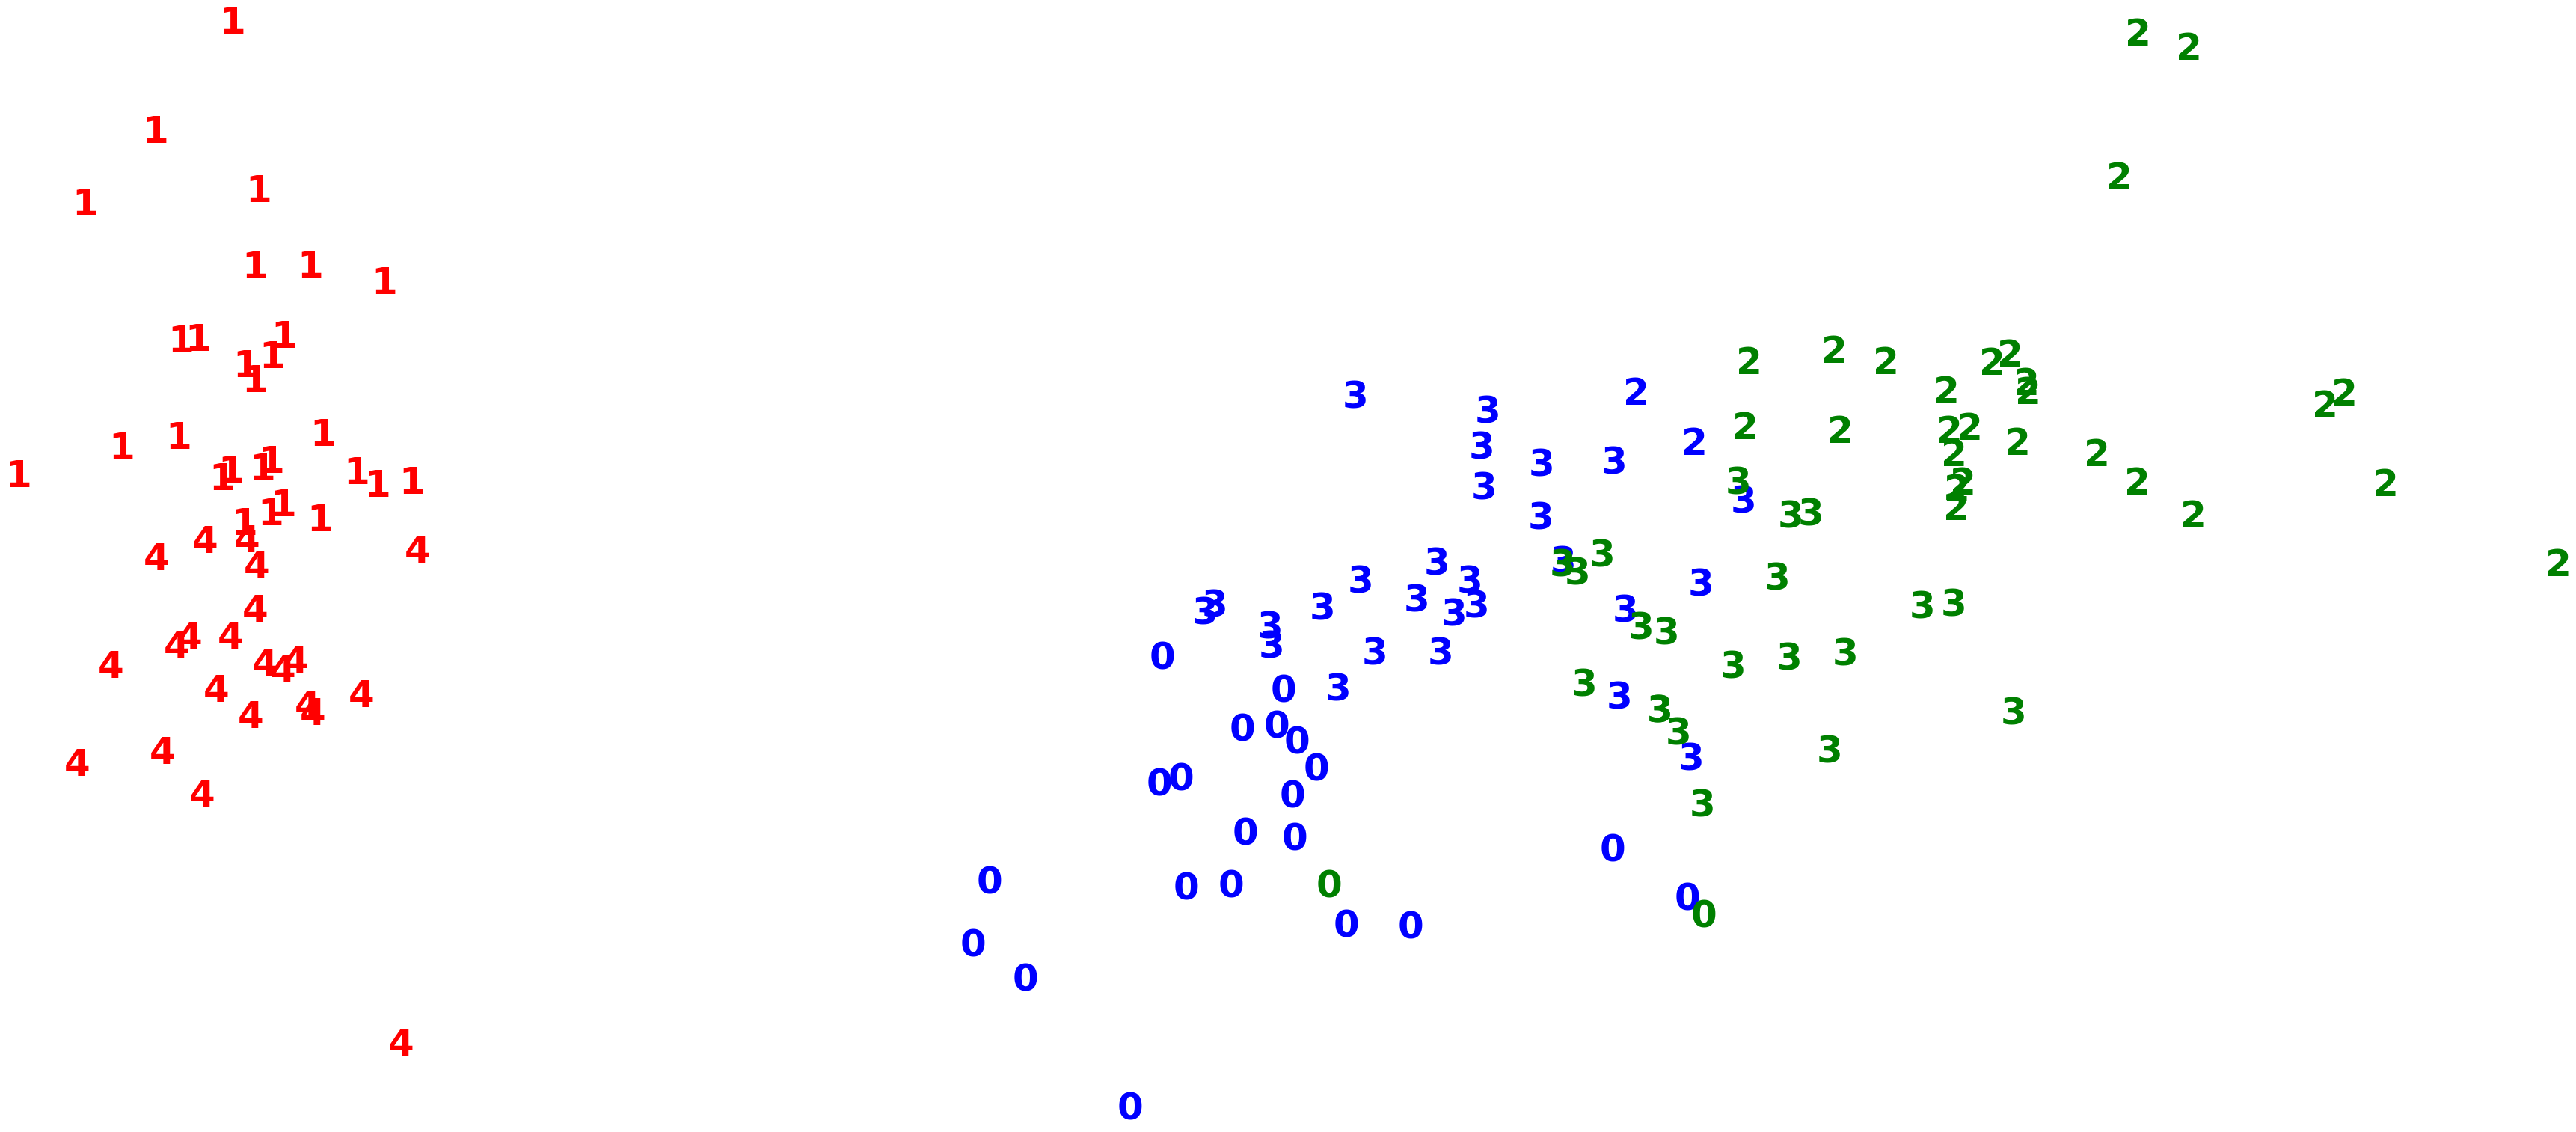

In [22]:
pca = PCA(n_components = 2).fit_transform(x_std)

plt.figure(figsize = (10, 5))
colors = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i, 1], str(y_pred[i]),
             color = colors[y[i]],
             fontdict = {'weight': 'bold', 'size': 50}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

5.74 ms ± 183 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


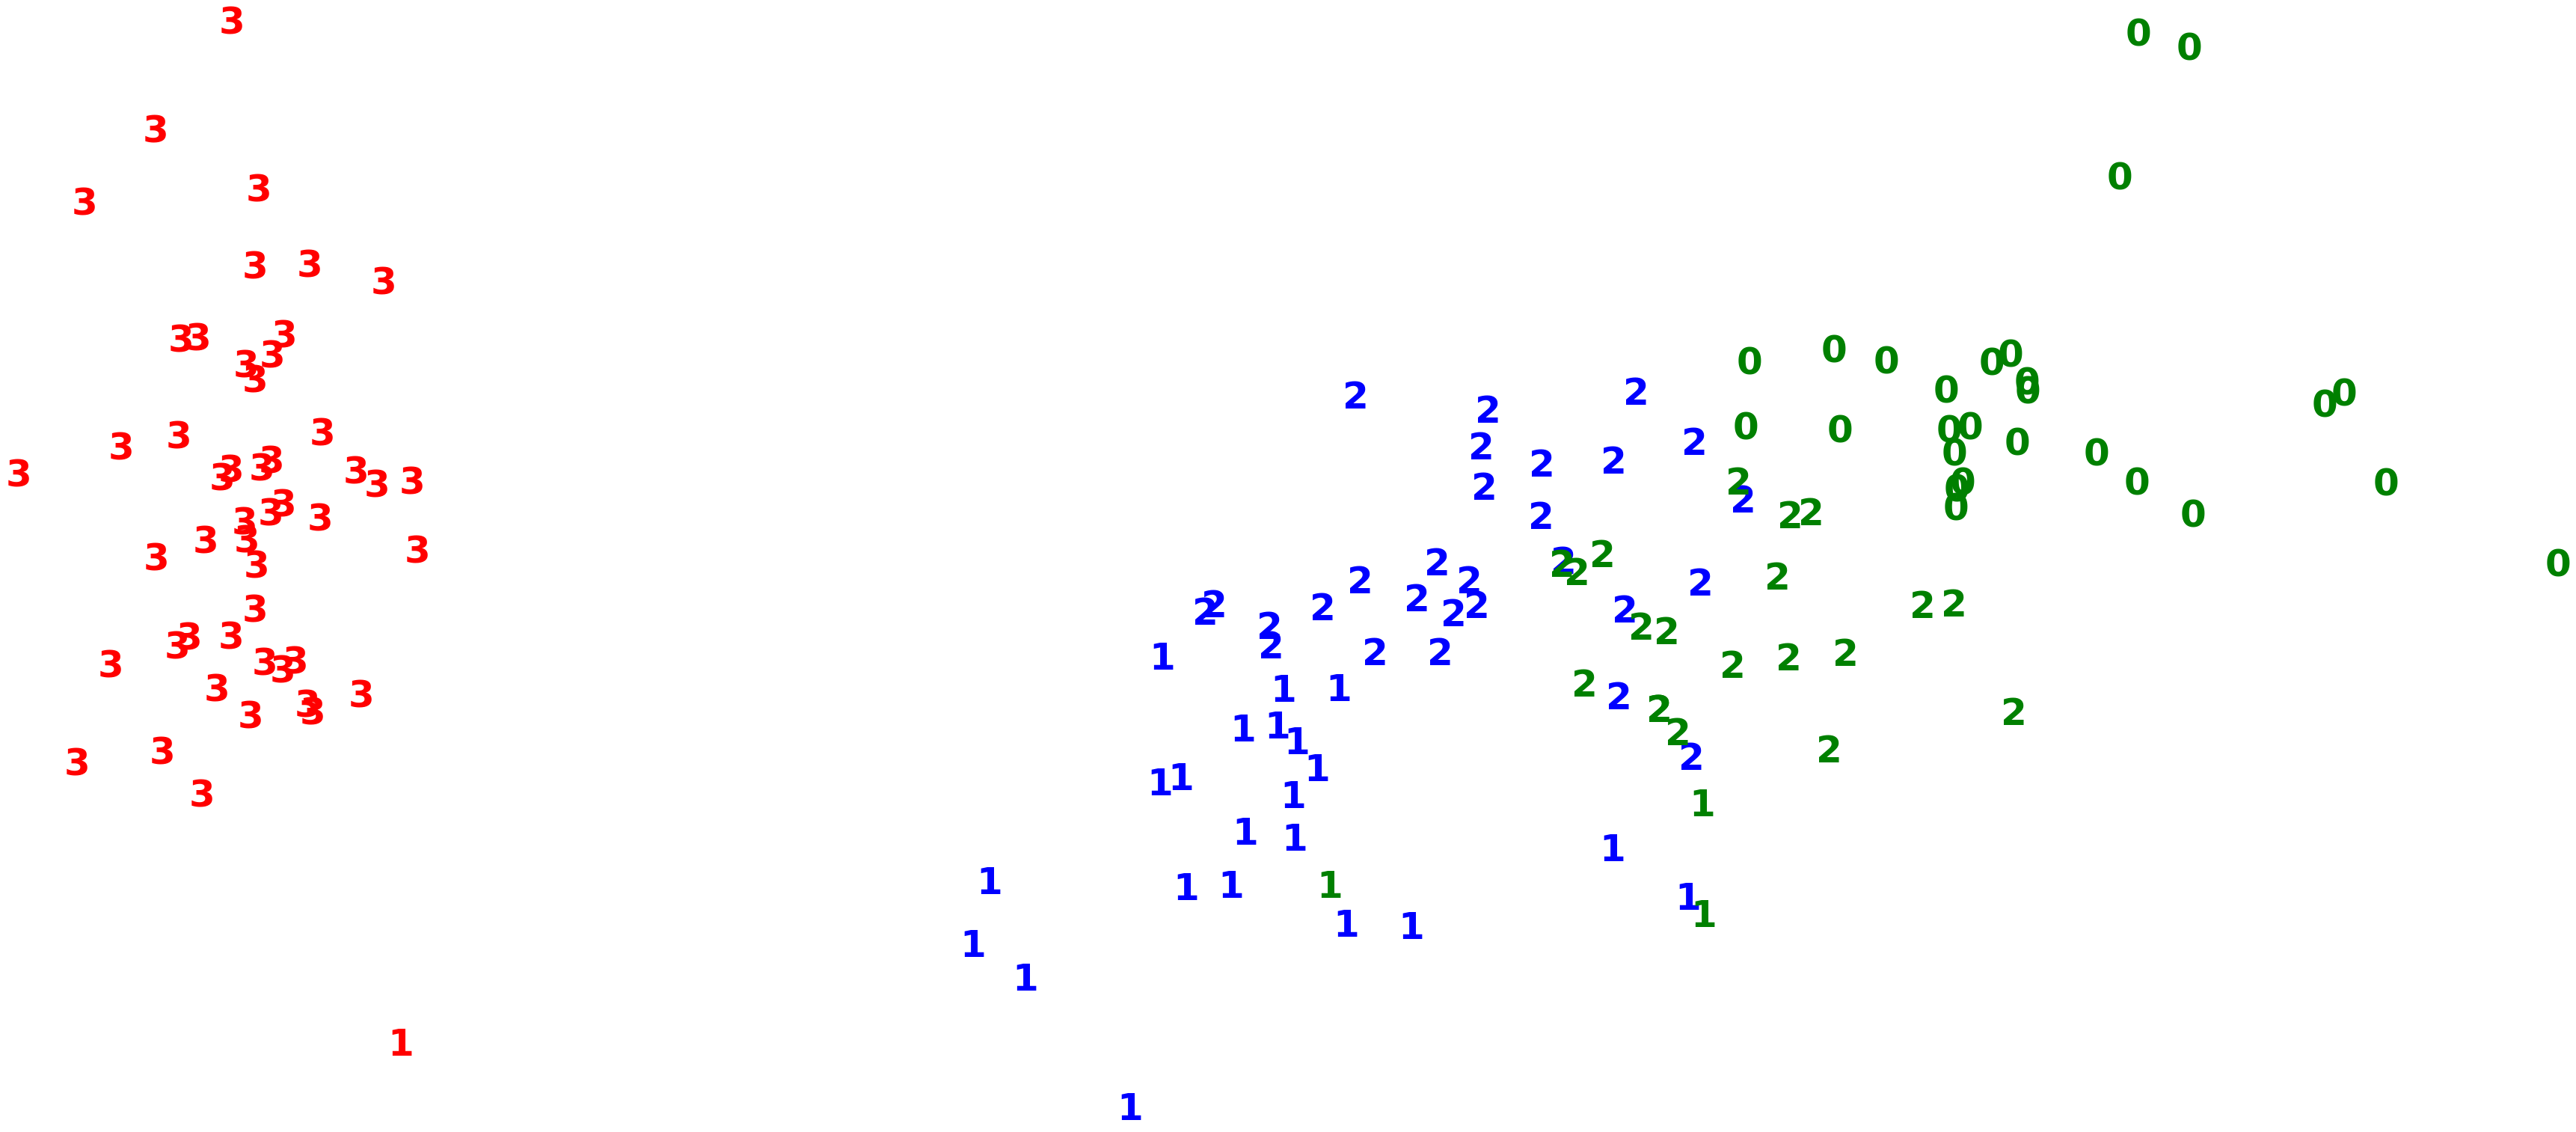

In [19]:
# Defining the mini-batch k-means

minikmeans_cluster = MiniBatchKMeans(
    init = "random",
    n_clusters = 4, 
    batch_size = 50)

# Fit model
%timeit minikmeans_cluster.fit(x_std)
minikmeans_cluster = minikmeans_cluster.predict(x_std)

plt.figure(figsize = (10, 5))
colors = 'rbg'

for i in range(pca.shape[0]):
    plt.text(pca[i,0], pca[i, 1], str(minikmeans_cluster[i]),
             color = colors[y[i]],
             fontdict = {'weight': 'bold', 'size': 50}
             )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Summary: Three clusters for K-Means vs. Mini Batch K-Means: Performance was 21.1 ms vs. 5.7 ms. In addition, mini-batch k-means was more accurate with a better rate of distinguishing between the two clusters on the right. 

Four clusters have improved accuracy for cluster formation and labeling. But the plots are a bit messier at five clusters with more overlap than at four clusters. I recommend four clusters for the iris dataset. 
